# Unsupervised Lab Session

## Learning outcomes:
- Exploratory data analysis and data preparation for model building.
- PCA for dimensionality reduction.
- K-means and Agglomerative Clustering

## Problem Statement
Based on the given marketing campigan dataset, segment the similar customers into suitable clusters. Analyze the clusters and provide your insights to help the organization promote their business.

## Context:
- Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.
- Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

## About dataset
- Source: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis?datasetId=1546318&sortBy=voteCount

### Attribute Information:
- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise
- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years
- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s website in the last month

### 1. Import required libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage,dendrogram

### 2. Load the CSV file (i.e marketing.csv) and display the first 5 rows of the dataframe. Check the shape and info of the dataset.

In [2]:
data = pd.read_csv(r'marketing.csv')
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,4/9/2012,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,8/3/2014,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/2/2014,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,3,6,5,0,0,0,0,0,0,0


### 3. Check the percentage of missing values? If there is presence of missing values, treat them accordingly.

In [3]:
(data.isnull().sum()*100)/len(data)

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Response               0.000000
dtype: float64

In [6]:
# data.replace(data[data['Income'].isnull()],data['Income'].mode())
data['Income']=data['Income'].fillna(data['Income'].mean())

In [7]:
data[data['Income'].isnull()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response


### 4. Check if there are any duplicate records in the dataset? If any drop them.

In [8]:
data[data.duplicated()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response


### 5. Drop the columns which you think redundant for the analysis 

In [9]:
#Drop the Id column as its redundant for EDA analysis.
data.drop('ID',axis=1,inplace=True)

In [10]:
# The date formate is not consistant on analysis
data['Dt_Customer']

0         4/9/2012
1         8/3/2014
2       21-08-2013
3        10/2/2014
4       19-01-2014
           ...    
2235    13-06-2013
2236     10/6/2014
2237    25-01-2014
2238    24-01-2014
2239    15-10-2012
Name: Dt_Customer, Length: 2240, dtype: object

In [11]:
#The date format seem bit off from the above output so formating the date with pd.to_datetime()
data['Dt_Customer']=pd.to_datetime(data['Dt_Customer'])
data['Dt_Customer']

0      2012-04-09
1      2014-08-03
2      2013-08-21
3      2014-10-02
4      2014-01-19
          ...    
2235   2013-06-13
2236   2014-10-06
2237   2014-01-25
2238   2014-01-24
2239   2012-10-15
Name: Dt_Customer, Length: 2240, dtype: datetime64[ns]

In [12]:
data.drop('Dt_Customer',axis=1,inplace=True)

### 6. Check the unique categories in the column 'Marital_Status'
- i) Group categories 'Married', 'Together' as 'relationship'
- ii) Group categories 'Divorced', 'Widow', 'Alone', 'YOLO', and 'Absurd' as 'Single'.

In [13]:
# Find the unique values of the column
data['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [14]:
# Replace columns as single or Relationship
data['Marital_Status']=data['Marital_Status'].replace({'Together', 'Married'},'Relationship')
data['Marital_Status']=data['Marital_Status'].replace({'Divorced','Widow','Alone','YOLO','Absurd'},'Single')

In [15]:
data['Marital_Status'].unique()

array(['Single', 'Relationship'], dtype=object)

### 7. Group the columns 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', and 'MntGoldProds' as 'Total_Expenses'

In [25]:
# clubbing method used : More sound method
Total_Expenses= [col for col in data.columns.values if col.startswith('Mnt')]
data['Total_Expenses']=data[Total_Expenses].sum(axis=1)
data['Total_Expenses'].describe()

count    2240.000000
mean      605.798214
std       602.249288
min         5.000000
25%        68.750000
50%       396.000000
75%      1045.500000
max      2525.000000
Name: Total_Expenses, dtype: float64

In [26]:
data.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Total_Expenses'],
      dtype='object')

### 8. Group the columns 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', and 'NumDealsPurchases' as 'Num_Total_Purchases'

In [27]:
# To  fond the sum of the above columns to a single column 'Num_Total_Purchases'
Colmn_series = pd.Series(data.columns)
req_Colm=Colmn_series[Colmn_series.str.endswith('Purchases')].tolist()
data['Num_Total_Purchases']=data[req_Colm].sum(axis=1)
data['Num_Total_Purchases'].describe()

count    2240.000000
mean       14.862054
std         7.677173
min         0.000000
25%         8.000000
50%        15.000000
75%        21.000000
max        44.000000
Name: Num_Total_Purchases, dtype: float64

In [28]:
data.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Total_Expenses', 'Num_Total_Purchases'],
      dtype='object')

### 9. Group the columns 'Kidhome' and 'Teenhome' as 'Kids'

In [29]:
#Add both the above columns to a single column - Kids column
Kids = [col for col in data.columns if col.endswith('home')]
data['Kids']=data[Kids].sum(axis=1)
data.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Total_Expenses', 'Num_Total_Purchases',
       'Kids'],
      dtype='object')

### 10. Group columns 'AcceptedCmp1 , 2 , 3 , 4, 5' and 'Response' as 'TotalAcceptedCmp'

In [30]:
colm_info=pd.Series(data.columns)
colm_info=colm_info[colm_info.str.startswith('AcceptedCmp').values].tolist()
colm_info.append('Response')
data['TotalAcceptedCmp']=data[colm_info].sum(axis=1)

In [31]:
data['TotalAcceptedCmp'].describe()

count    2240.000000
mean        0.446875
std         0.890543
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         5.000000
Name: TotalAcceptedCmp, dtype: float64

In [32]:
data.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Total_Expenses', 'Num_Total_Purchases', 'Kids',
       'TotalAcceptedCmp'],
      dtype='object')

### 11. Drop those columns which we have used above for obtaining new features

In [33]:
data.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Total_Expenses', 'Num_Total_Purchases', 'Kids',
       'TotalAcceptedCmp'],
      dtype='object')

In [3]:
#Drop redundant columns
data.drop(columns=data[Total_Expenses],axis=1,inplace=True)
data.drop(columns=colm_info,axis=1,inplace=True)
data.drop(columns=data[req_Colm],axis=1,inplace=True)
data.drop(columns=data[Kids],axis=1,inplace=True)

NameError: name 'data' is not defined

In [35]:
data.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Recency',
       'NumWebVisitsMonth', 'Complain', 'Total_Expenses',
       'Num_Total_Purchases', 'Kids', 'TotalAcceptedCmp'],
      dtype='object')

### 12. Extract 'age' using the column 'Year_Birth' and then drop the column 'Year_birth'

In [36]:
from datetime import datetime
current_year=datetime.now().year

In [37]:
data['age'] = current_year-data['Year_Birth']
data['age']

0       66
1       69
2       58
3       39
4       42
        ..
2235    56
2236    77
2237    42
2238    67
2239    69
Name: age, Length: 2240, dtype: int64

In [38]:
data.drop(columns='Year_Birth',axis=1,inplace=True)

In [39]:
df_clean = data.copy()

### 13. Encode the categorical variables in the dataset

In [40]:
col=['Education','Marital_Status']
lb=LabelEncoder()    
for c in col:
    data[c] = data[[c]].apply(lb.fit_transform)

### 14. Standardize the columns, so that values are in a particular range

In [41]:
df=data.copy()
st =StandardScaler()
# scaled_feature=st.fit_transform(df.iloc[:,:len(df.columns)]) //as this or the one just below
scaled_feature=st.fit_transform(df.values)
scaled_feature_df = pd.DataFrame(scaled_feature,index=df.index,columns=df.columns)

In [42]:
scaled_feature_df.head(3)

,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp,age
0,-0.350141,1.346874,0.235327,0.307039,0.693904,-0.097282,1.679417,1.320826,-1.264505,0.621248,0.985345
1,-0.350141,1.346874,-0.235826,-0.383664,-0.130463,-0.097282,-0.961275,-1.154596,1.396361,-0.501912,1.235733
2,-0.350141,-0.742460,0.773633,-0.798086,-0.542647,-0.097282,0.282673,0.799685,-1.264505,-0.501912,0.317643


### 15. Apply PCA on the above dataset and determine the number of PCA components to be used so that 90-95% of the variance in data is explained by the same.

In [43]:
#Step 1:Calculate Covariance
cov_matrix = np.cov(scaled_feature_df.T)

In [44]:
#Step 2:Calculate Eig Vectors
eig_vals, eig_vectors = np.linalg.eig(cov_matrix)
print('eigein vals:','\n',eig_vals)
print('\n')
print('eigein vectors:','\n',eig_vectors)

eigein vals: 
 [3.19039372 0.15898065 0.33403219 1.25762686 0.57476787 0.70088408
 0.81488009 0.88268465 1.07560545 0.99819186 1.01686548]


eigein vectors: 
 [[-8.10878879e-02  1.28355184e-02 -2.36293947e-02 -5.51249544e-01
   9.44095922e-02  1.09410621e-01  6.91170717e-01 -2.13981881e-01
   3.53512225e-01  1.33215293e-01  4.14647769e-02]
 [-1.66012105e-02 -5.44320001e-04  2.67214391e-03  7.24616823e-02
  -9.22507506e-03  1.59630615e-01 -9.75252262e-02  2.48006969e-01
   2.93241983e-01  5.20771188e-01 -7.35314297e-01]
 [-4.53880338e-01  1.10208189e-01  7.33626969e-01 -1.11676478e-01
  -4.01003018e-01  2.33850859e-01 -3.55906464e-02  8.23323221e-02
  -7.12476789e-02 -3.27656138e-02  3.84949439e-02]
 [ 4.86396555e-03  3.74604574e-02  1.76527197e-02 -1.12971535e-01
  -4.88116231e-02 -1.39195279e-01  2.76319114e-02 -4.78177475e-01
  -6.57510164e-01  5.43205810e-01 -8.32561223e-02]
 [ 3.78658345e-01 -9.89489261e-02  5.23256954e-01 -3.88425153e-02
   4.48112460e-01  8.25533630e-02 -2.949122

In [45]:
#Step 3: Screen Plot
total= sum(eig_vals)
var_exp = [(i/total)*100 for i in sorted(eig_vals,reverse=True)]
cumlt_var_exp = np.cumsum(var_exp)
print('Explained Variance: ',var_exp)
print('Cummulative Variance Explained: ',cumlt_var_exp)

Explained Variance:  [28.990631201030766, 11.427867418203103, 9.773866099738857, 9.240104772844933, 9.070420346680963, 8.02082362679235, 7.404693691240494, 6.368828985843826, 5.222829816381435, 3.035300649436164, 1.4446333918071097]
Cummulative Variance Explained:  [ 28.9906312   40.41849862  50.19236472  59.43246949  68.50288984
  76.52371347  83.92840716  90.29723614  95.52006596  98.55536661
 100.        ]


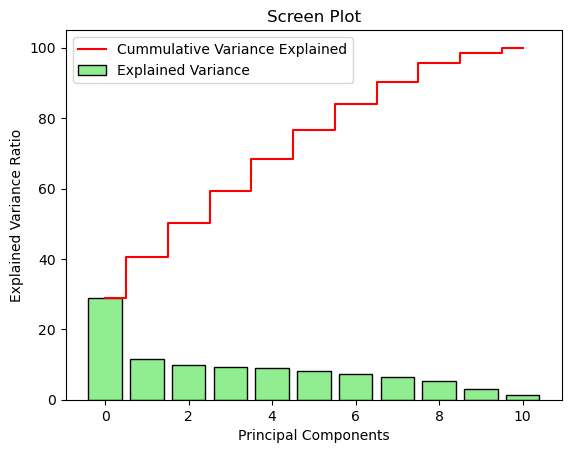

In [46]:
# Scree Plot
plt.bar(range(11),var_exp,align='center',color='lightgreen',edgecolor='black',label='Explained Variance')
plt.step(range(11),cumlt_var_exp,where='mid',color='red',label='Cummulative Variance Explained')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Screen Plot')
plt.legend(loc='best')
plt.show()

### 16. Apply K-means clustering and segment the data (Use PCA transformed data for clustering)

In [47]:
pca = PCA(n_components=8)
pca_df=pd.DataFrame(pca.fit_transform(scaled_feature_df),columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8'])
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,1.956902,-0.081936,-0.344667,1.193687,-0.696970,-0.299137,-1.145041,-0.358094
1,-1.512598,1.000666,-0.367106,1.006953,-0.445000,1.371965,-0.724374,-0.346359
2,1.314538,-0.299417,0.296366,-0.764913,0.732877,0.984394,0.025389,0.058563
3,-1.755094,-1.139847,-0.254499,-0.825065,0.579217,0.221975,0.562426,0.239541
4,0.063584,0.571435,0.902243,-0.757574,-0.794825,-1.241683,1.325626,0.898316


In [48]:
#K-mean clustering using PCA transformation data
cluster_error = []
cluster_range = range(2,15)
for i in cluster_range:
    Clusters = KMeans(i,random_state=100)
    Clusters.fit(pca_df)
    cluster_error.append(Clusters.inertia_)

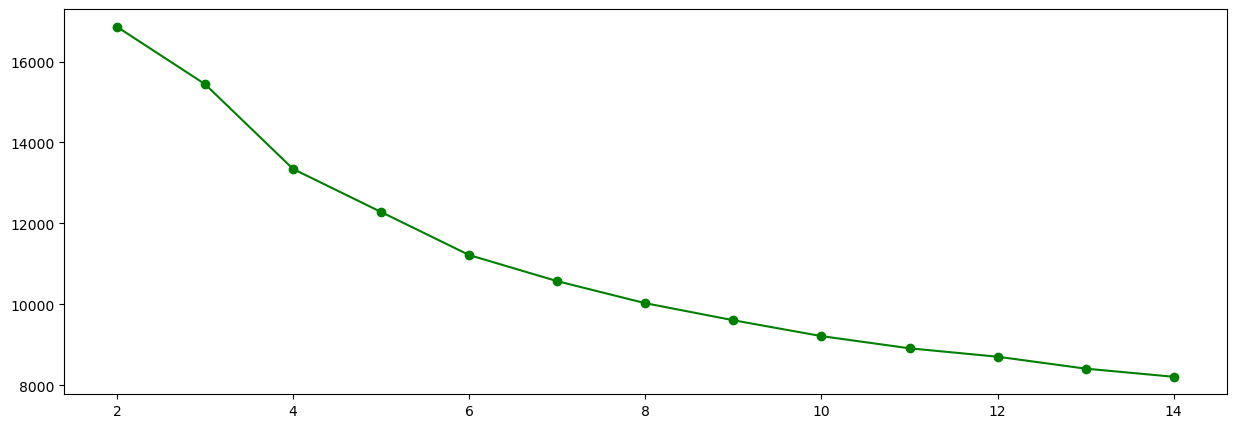

In [49]:
#Creating Dataframe for number of cluster_error and cluster_range.
cluster_df = pd.DataFrame({'num_clusters':cluster_range,'cluster_error':cluster_error})

# Elbow plot.
plt.figure(figsize=(15,5))
plt.plot(cluster_df['num_clusters'],cluster_df['cluster_error'],marker='o',color='g')
plt.show()


In [50]:
# Applying KMeans clustering for the optimal number of clusters obtained above.
kmean = KMeans(n_clusters=3, random_state=100)
kmean.fit(pca_df)

KMeans(n_clusters=3, random_state=100)

In [51]:
# creating a dataframe of the Labels.
label = pd.DataFrame(kmean.labels_,columns=['Label'])

In [52]:
# Joining the label dataframe to the pca_df dataframe
kmean_df = pca_df.join(label)
kmean_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,Label
0,1.956902,-0.081936,-0.344667,1.193687,-0.696970,-0.299137,-1.145041,-0.358094,0
1,-1.512598,1.000666,-0.367106,1.006953,-0.445000,1.371965,-0.724374,-0.346359,1
2,1.314538,-0.299417,0.296366,-0.764913,0.732877,0.984394,0.025389,0.058563,0
3,-1.755094,-1.139847,-0.254499,-0.825065,0.579217,0.221975,0.562426,0.239541,1
4,0.063584,0.571435,0.902243,-0.757574,-0.794825,-1.241683,1.325626,0.898316,2


In [53]:
kmean_df['Label'].value_counts()

1    1023
2     704
0     513
Name: Label, dtype: int64

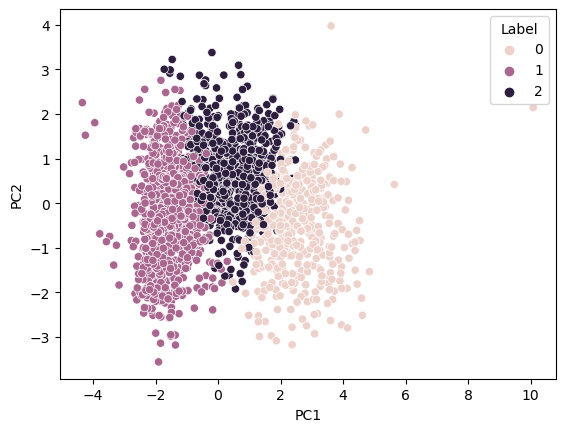

In [54]:
#Visualisation the cluster formed
sns.scatterplot(x=kmean_df['PC1'],y=kmean_df['PC2'],hue='Label',data=kmean_df)
plt.show()


### 17. Apply Agglomerative clustering and segment the data (Use Original data for clustering), and perform cluster analysis by doing bivariate analysis between the cluster label and different features and write your observations.

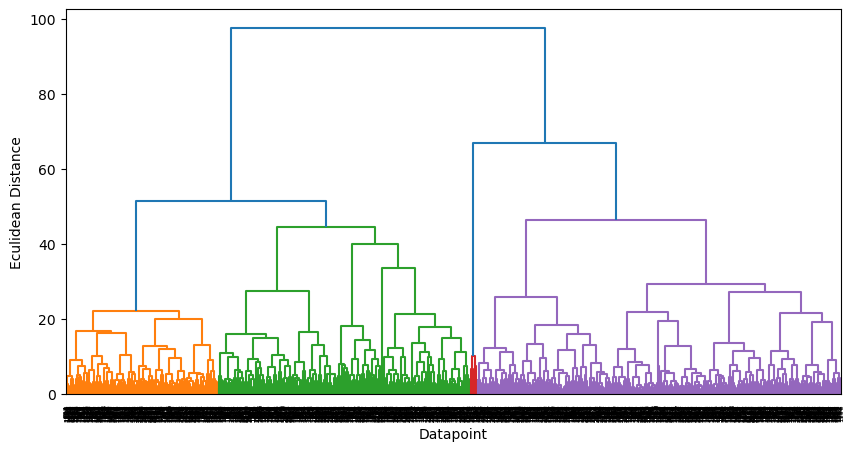

In [55]:
plt.figure(figsize=[10,5])
ward=linkage(scaled_feature,method='ward')
dendrogram(ward, leaf_rotation=90,color_threshold=0.5*max(ward[:, 2]))
plt.xlabel('Datapoint')
plt.ylabel('Eculidean Distance')
plt.show()

In [56]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering

In [57]:
for i in range(2,15):
    hier = AgglomerativeClustering(n_clusters=i)
    hier = hier.fit(scaled_feature_df)
    labels = hier.fit_predict(scaled_feature_df)
    print(f'silhouette_score {i}:{silhouette_score(scaled_feature_df,labels)}')

silhouette_score 2:0.19083932398838058
silhouette_score 3:0.19859065923117852
silhouette_score 4:0.11245037433443192
silhouette_score 5:0.11424621756848156
silhouette_score 6:0.13181821517761894
silhouette_score 7:0.13957002140181554
silhouette_score 8:0.13907063102689643
silhouette_score 9:0.11337088108573284
silhouette_score 10:0.11192131225138054
silhouette_score 11:0.10382081162126386
silhouette_score 12:0.10893099764773469
silhouette_score 13:0.10233949588313333
silhouette_score 14:0.09549869159575398


In [58]:
#Build hierarchical clustering model using k=3 as the optimal cluster with scaled dataset.
hrch_cluster = AgglomerativeClustering(n_clusters=3,linkage='ward',affinity='euclidean')
hrchClt_model = hrch_cluster.fit(scaled_feature_df)

In [59]:
# Create dataframe of the labels
hr_dfLabel=pd.DataFrame(hrchClt_model.labels_,columns=['label'])
hr_dfLabel.head()

,label
0,0
1,1
2,0
3,1
4,0


In [60]:
# Joining Label dataframe with the unscaled initial data
df_hier = df_clean.join(hr_dfLabel)
df_hier.head()

,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp,age,label
0,Graduation,Single,58138.0,58,7,0,1617,25,0,1,66,0
1,Graduation,Single,46344.0,38,5,0,27,6,2,0,69,1
2,Graduation,Relationship,71613.0,26,4,0,776,21,0,0,58,0
3,Graduation,Relationship,26646.0,26,6,0,53,8,1,0,39,1
4,PhD,Relationship,58293.0,94,5,0,422,19,1,0,42,0


### Visualization and Interpretation of results

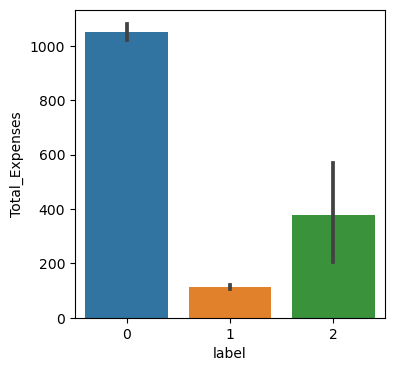

In [61]:
# Comparison of Total_expense and Label
plt.figure(figsize=[4,4])
sns.barplot(x=df_hier['label'],y=df_hier['Total_Expenses'])
plt.show()

In [ ]:
# Total expenses of cluster Label O is highestmeans they are buying the goods maximum 

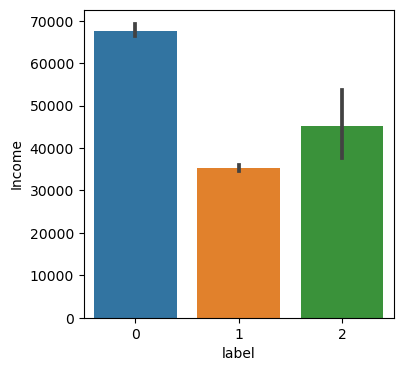

In [62]:
# Compare Label and Inccome.
plt.figure(figsize=[4,4])
sns.barplot(x=df_hier['label'],y=df_hier['Income'])
plt.show()

In [ ]:
# Heighr the income heigher the purchases in cluster 0 where this tendency is least with label 1 label 2 customers are proportionatly increases with groth in income

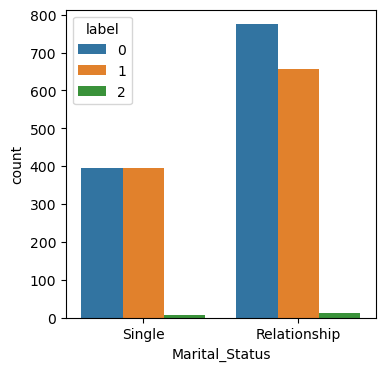

In [63]:
#Compare Marital_status and Label
plt.figure(figsize=[4,4])
sns.countplot(x=df_hier['Marital_Status'],hue=df_hier['label'],data=df_hier)
plt.show()

In [ ]:
# cluster "0"  customers speciallyand cluster '1' customers in relationship have great purchases compared to singles 

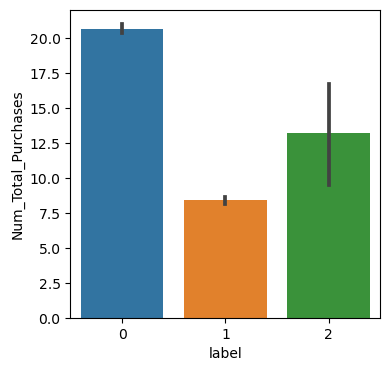

In [64]:
#compare Num_Total_Purchases with label.Label
plt.figure(figsize=[4,4])
sns.barplot(x=df_hier['label'],y=df_hier['Num_Total_Purchases'])
plt.show()


In [ ]:
# Cluster '0' has made the maxumum purchases in terms of value followed by cluster '2' customers

-----
## Happy Learning
-----